### Rolling predictions 

Comparing results on scikit tree & forest, prophet, SARIMA and craft on energy time series

We start by feeding the model 2 months of data, and ask them to predict 1 week

In [2]:
import pandas as pd
import numpy as np
import subprocess
import json
import benchmark_tools as bt
import pickle
import matplotlib.pyplot as plt
import itertools

In [3]:
import logging
import warnings
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [5]:
data = pd.read_csv('data/ampds/ampds_power_30T.csv')
data.index = pd.to_datetime(data.date, unit="s")
data = data.dropna().drop('date',1)
#Adding temperature information
temp = pd.read_csv('data/ampds/ampds_temp_30T.csv', parse_dates=['date'])
temp.index = pd.to_datetime(temp.date, unit='s')
temp = temp.drop('date',1)
data = data.merge(temp, left_index=True, right_index=True)
data.index.freq = '30T'

In [6]:
data.index.values[0], data.index.values[-1]

(numpy.datetime64('2012-04-01T07:00:00.000000000'),
 numpy.datetime64('2014-04-01T06:30:00.000000000'))

In [7]:
data.head()

,load,temp
date,,
2012-04-01 07:00:00,1947.400000,4.7
2012-04-01 07:30:00,1269.766667,4.7
2012-04-01 08:00:00,1645.300000,5.3
2012-04-01 08:30:00,845.666667,5.3
2012-04-01 09:00:00,1584.966667,5.9


In [8]:
print('{} semaines dans les données'.format(round((data.index[-1] - data.index[0]).days/7,2)))

104.14 semaines dans les données


In [63]:
craft_preds = pd.read_json('preds/ampds_7_rolling_results.json', convert_dates=['date']).set_index('date')

In [65]:
craft_preds.tail()

,confidence,context,decisionRules,predictedLoad,standardDeviation
date,,,,,
2014-04-01 04:30:00,0.688148,"{'time': 21.5, 'day': 0, 'month': 3, 'timezone...","[{'operand': [6.5, 23.5], 'operator': '[in[', ...",1674.31510,752.75100
2014-04-01 05:00:00,0.688148,"{'time': 22, 'day': 0, 'month': 3, 'timezone':...","[{'operand': [6.5, 23.5], 'operator': '[in[', ...",1674.31510,752.75100
2014-04-01 05:30:00,0.688148,"{'time': 22.5, 'day': 0, 'month': 3, 'timezone...","[{'operand': [6.5, 23.5], 'operator': '[in[', ...",1674.31510,752.75100
2014-04-01 06:00:00,0.761733,"{'time': 23, 'day': 0, 'month': 3, 'timezone':...","[{'operand': [6.5, 23.5], 'operator': '[in[', ...",955.13336,248.60645
2014-04-01 06:30:00,0.733885,"{'time': 23.5, 'day': 0, 'month': 3, 'timezone...","[{'operand': [23.5, 6.5], 'operator': '[in[', ...",664.63904,230.83023


Craft ai predictions for week n° 9


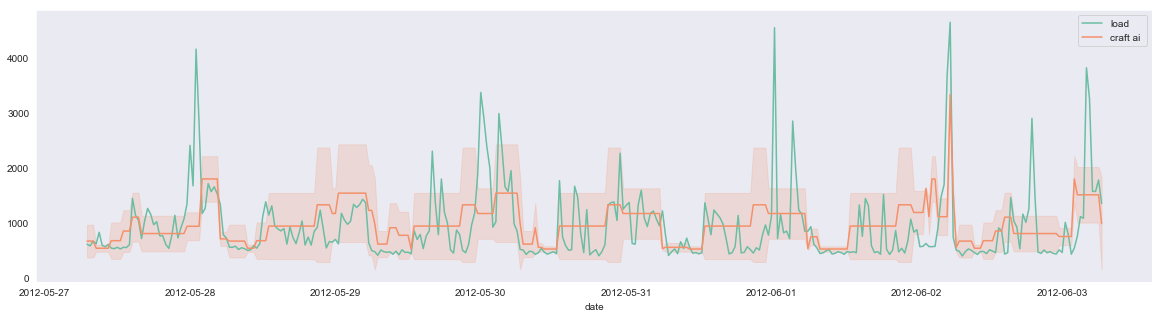

Model predictions for week n° 9


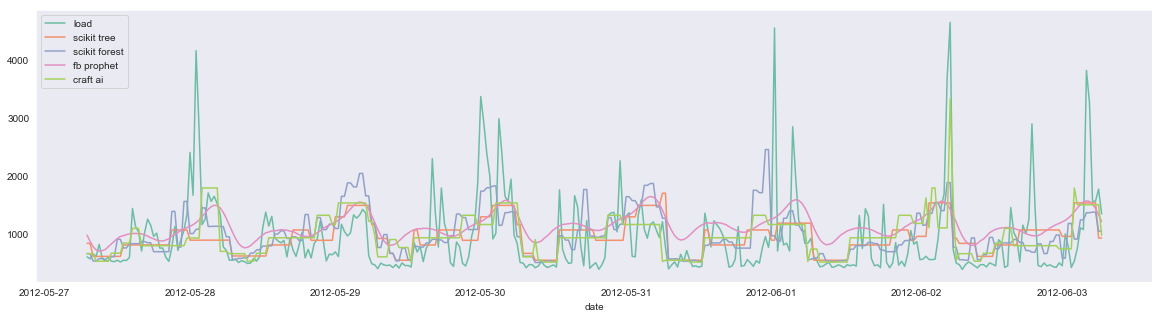

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    392.95  46.83  600.77  0.163957     9
scikit forest  410.60  48.47  615.78  0.121659     9
fb prophet     474.14  67.46  626.84  0.089828     9
craft ai       381.65  46.47  584.89  0.207582     9
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    569.87  55.78  927.60 -0.563200    10
scikit forest  530.82  54.94  816.30 -0.210595    10
fb prophet     433.15  44.44  695.03  0.122384    10
craft ai       479.15  50.12  734.22  0.020638    10
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    448.86  76.58  583.95 -1.219940    11
scikit forest  480.50  82.26  640.02 -1.666703    11
fb prophet     452.42  81.31  518.45 -0.749863    11
craft ai       389.40  61.69  521.73 -0.772070    11
                  mae   mape    rmse        r2

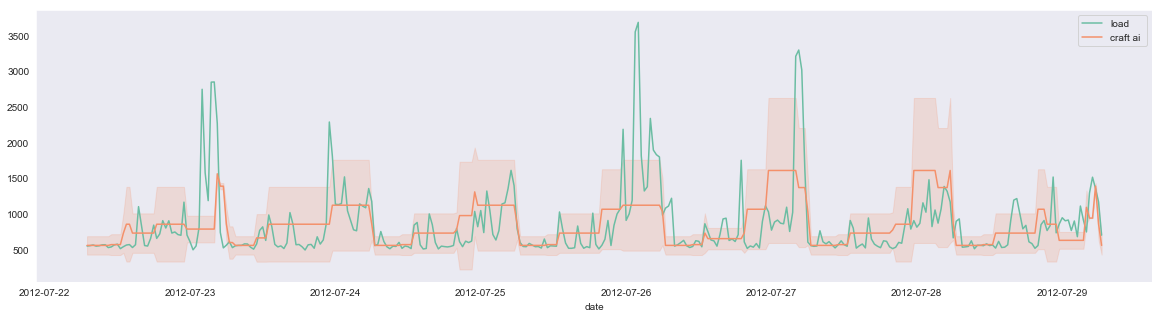

Model predictions for week n° 17


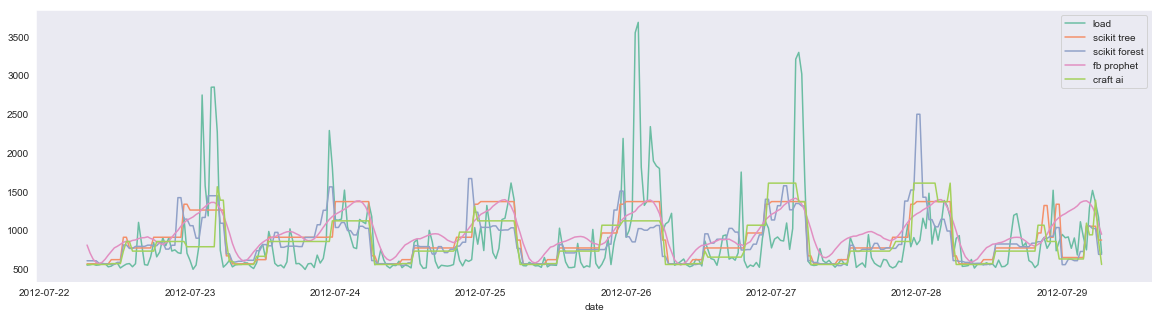

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    266.37  30.66  416.12  0.278067    17
scikit forest  264.81  29.42  441.45  0.187520    17
fb prophet     295.38  37.57  423.25  0.253114    17
craft ai       261.03  28.04  445.74  0.171649    17
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    347.76  34.53  662.73 -0.022040    18
scikit forest  370.47  37.21  695.41 -0.125325    18
fb prophet     322.07  30.84  606.62  0.143693    18
craft ai       319.00  31.87  626.70  0.086069    18
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    339.38  31.77  508.93  0.069438    19
scikit forest  324.88  33.37  463.29  0.228849    19
fb prophet     295.68  29.72  432.08  0.329235    19
craft ai       367.88  41.08  512.05  0.057997    19
                  mae   mape    rmse        r2

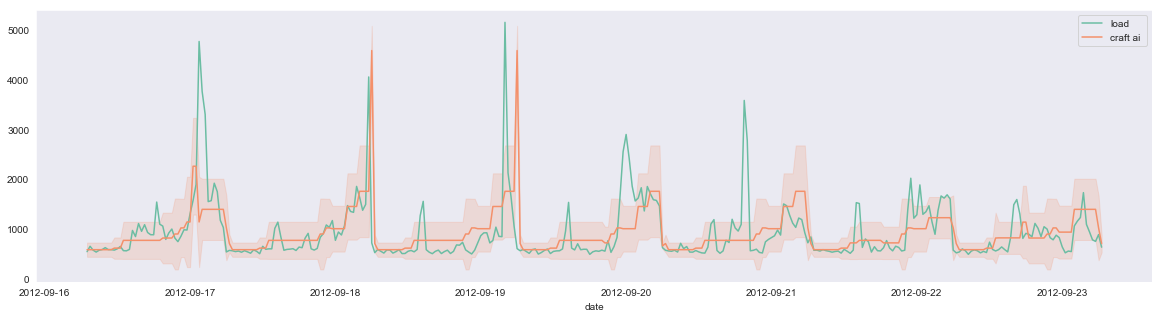

Model predictions for week n° 25


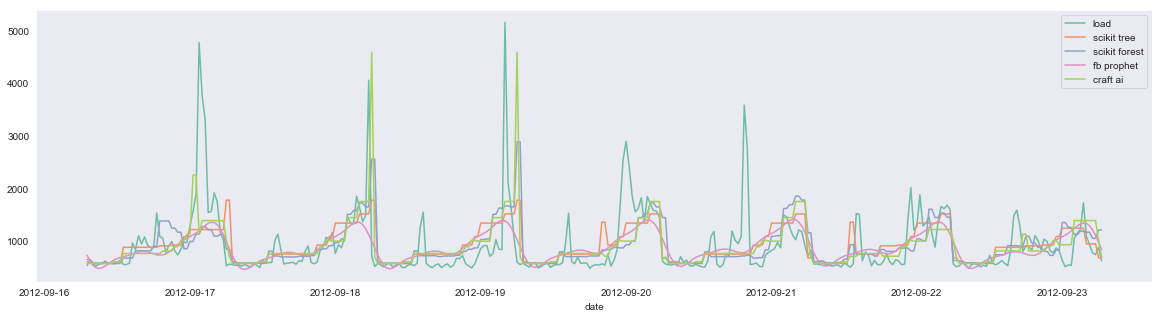

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    286.55  30.46  533.85  0.229960    25
scikit forest  302.21  30.73  575.01  0.106641    25
fb prophet     287.00  29.18  518.61  0.273298    25
craft ai       287.64  28.83  585.43  0.073965    25
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    299.41  31.82  517.63  0.204213    26
scikit forest  329.43  34.49  569.08  0.038166    26
fb prophet     287.12  30.38  514.59  0.213527    26
craft ai       288.36  29.44  530.72  0.163450    26
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    378.28  41.50  603.58  0.100771    27
scikit forest  395.93  41.99  648.99 -0.039596    27
fb prophet     328.49  32.61  586.02  0.152346    27
craft ai       381.31  40.82  621.80  0.045684    27
                  mae   mape    rmse        r2

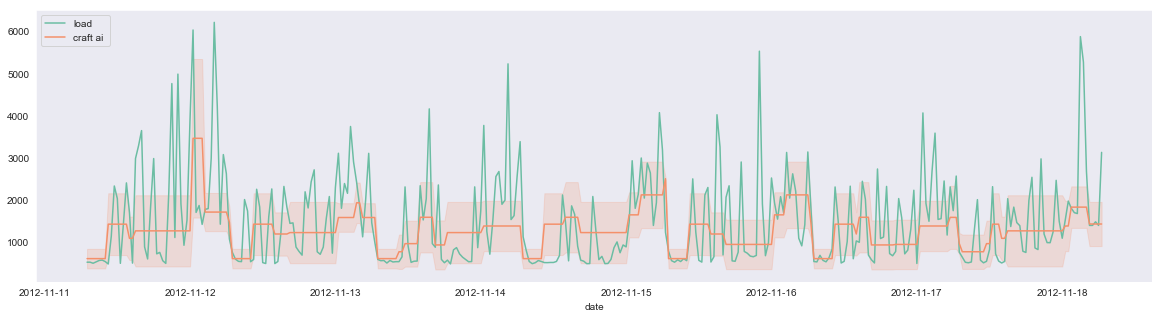

Model predictions for week n° 33


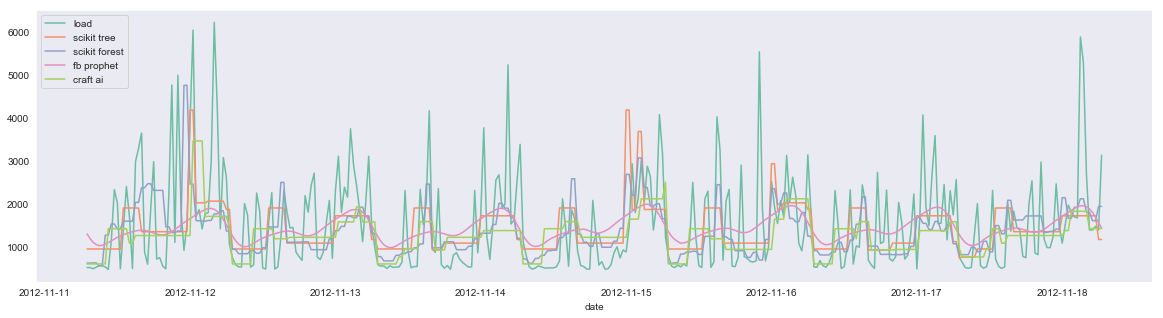

                  mae   mape     rmse        r2  week
ids                                                  
scikit tree    698.05  57.96   985.77  0.181171    33
scikit forest  692.98  53.35  1010.59  0.139417    33
fb prophet     742.24  65.71   992.11  0.170608    33
craft ai       683.74  50.03  1007.08  0.145386    33
                  mae   mape     rmse        r2  week
ids                                                  
scikit tree    688.84  53.03   920.87  0.087111    34
scikit forest  706.45  53.52   932.83  0.063243    34
fb prophet     722.16  65.32   887.29  0.152478    34
craft ai       783.67  57.91  1074.86 -0.243734    34
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    660.01  65.51  808.46  0.075773    35
scikit forest  664.06  67.27  834.42  0.015479    35
fb prophet     722.61  83.21  816.04  0.058372    35
craft ai       678.53  64.06  871.29 -0.073452    35
                  mae   mape     r

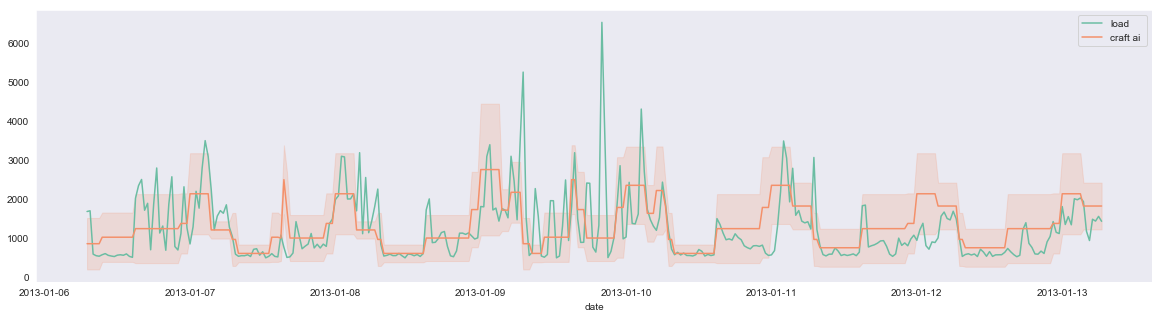

Model predictions for week n° 41


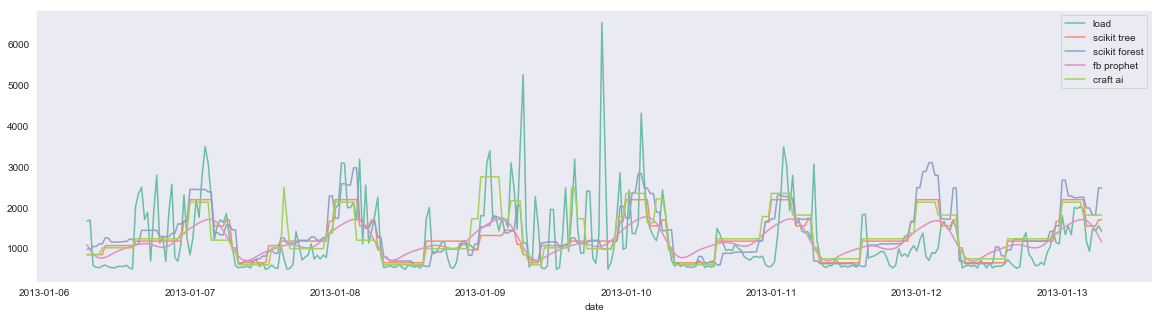

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    467.41  42.39  727.37  0.203621    41
scikit forest  528.27  48.18  780.54  0.082943    41
fb prophet     464.19  41.52  714.72  0.231084    41
craft ai       483.51  44.26  735.20  0.186387    41
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    350.52  27.03  633.07  0.369422    42
scikit forest  392.34  31.28  689.99  0.250923    42
fb prophet     409.85  35.15  682.44  0.267227    42
craft ai       406.90  33.09  684.19  0.263471    42
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    512.01  41.17  747.11  0.200143    43
scikit forest  572.42  49.35  795.85  0.092371    43
fb prophet     523.16  38.09  784.87  0.117240    43
craft ai       531.51  43.15  777.26  0.134286    43
                  mae   mape    rmse        r2

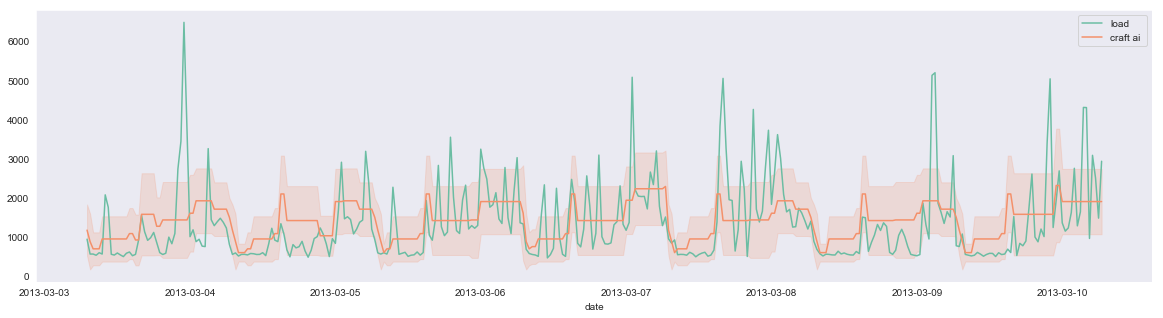

Model predictions for week n° 49


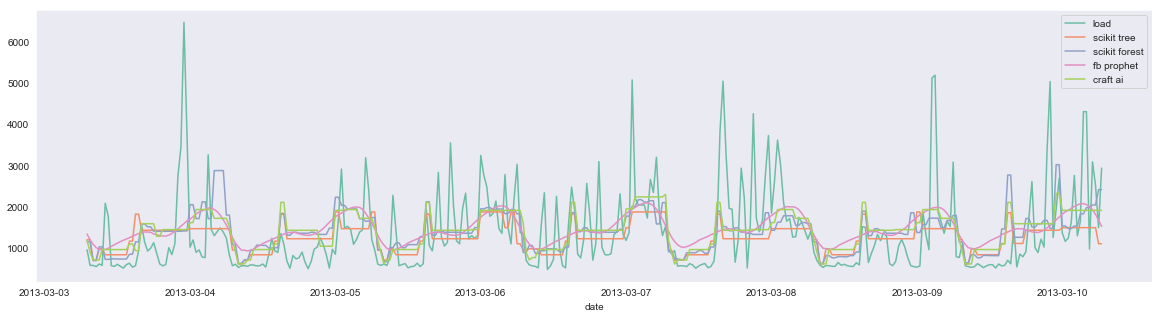

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    574.69  46.40  897.19  0.165262    49
scikit forest  613.88  53.28  890.39  0.177875    49
fb prophet     650.78  61.92  875.21  0.205673    49
craft ai       601.09  52.79  856.43  0.239381    49
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    701.98  57.37  942.06 -0.323387    50
scikit forest  732.91  64.89  956.94 -0.365509    50
fb prophet     638.49  57.54  793.10  0.062038    50
craft ai       546.52  43.67  754.69  0.150696    50
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    545.03  57.34  766.74  0.210246    51
scikit forest  551.99  55.40  777.88  0.187122    51
fb prophet     590.97  64.59  782.29  0.177893    51
craft ai       562.08  55.14  835.13  0.063063    51
                  mae   mape    rmse        r2

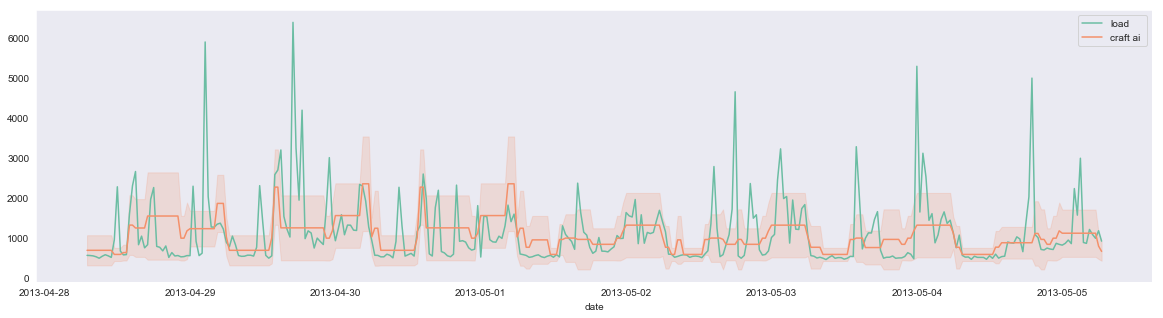

Model predictions for week n° 57


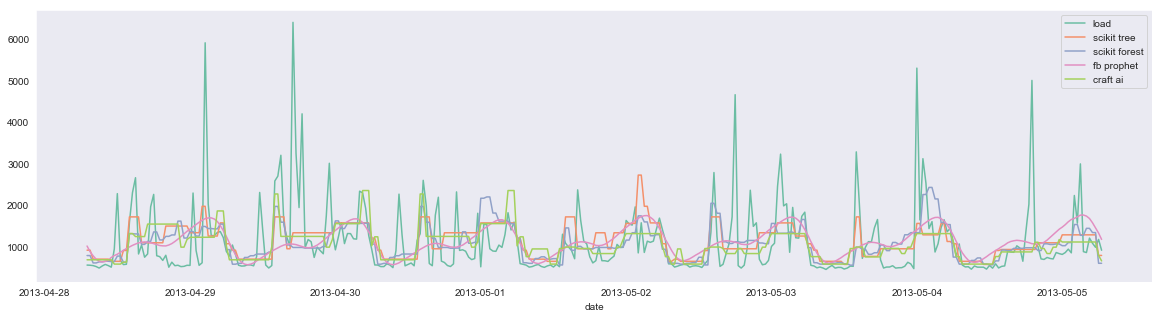

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    489.39  47.05  772.00  0.145146    57
scikit forest  463.63  42.15  781.10  0.124874    57
fb prophet     496.91  47.19  792.08  0.100095    57
craft ai       466.83  41.53  789.07  0.106921    57
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    282.35  30.95  463.84  0.063247    58
scikit forest  355.27  41.70  544.60 -0.291372    58
fb prophet     388.18  50.21  491.65 -0.052476    58
craft ai       256.05  28.54  408.21  0.274469    58
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    325.47  34.21  593.16  0.246391    59
scikit forest  313.86  31.24  596.94  0.236746    59
fb prophet     336.35  35.92  601.00  0.226326    59
craft ai       291.64  28.65  584.10  0.269227    59
                  mae   mape    rmse        r2

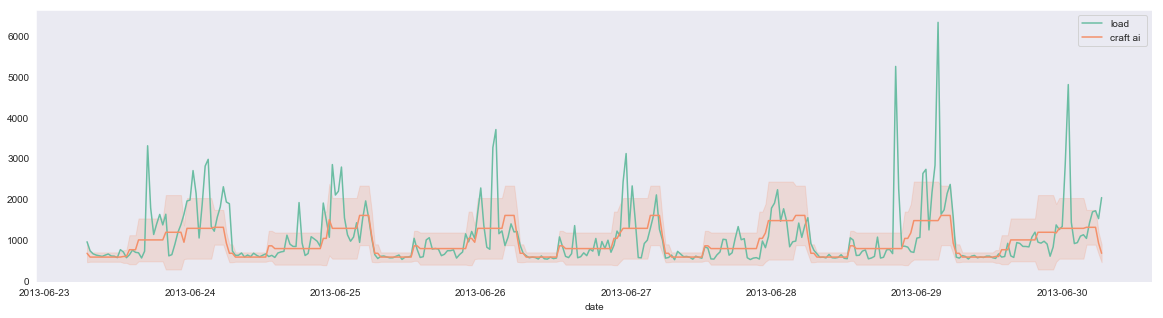

Model predictions for week n° 65


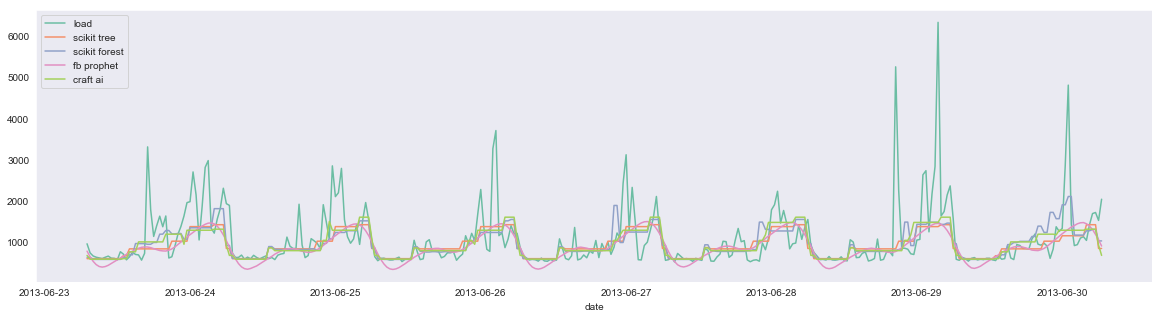

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    319.97  24.14  629.58  0.248517    65
scikit forest  326.83  25.12  622.24  0.265950    65
fb prophet     346.74  27.63  639.73  0.224100    65
craft ai       318.42  24.04  624.37  0.260912    65
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    330.78  24.68  652.50  0.198494    66
scikit forest  334.90  25.18  650.69  0.202916    66
fb prophet     360.21  28.59  666.95  0.162603    66
craft ai       321.01  24.87  627.10  0.259665    66
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    275.02  24.64  537.91  0.179903    67
scikit forest  281.20  25.17  545.67  0.156087    67
fb prophet     288.29  26.60  540.34  0.172479    67
craft ai       278.56  24.53  534.28  0.190945    67
                  mae   mape    rmse        r2

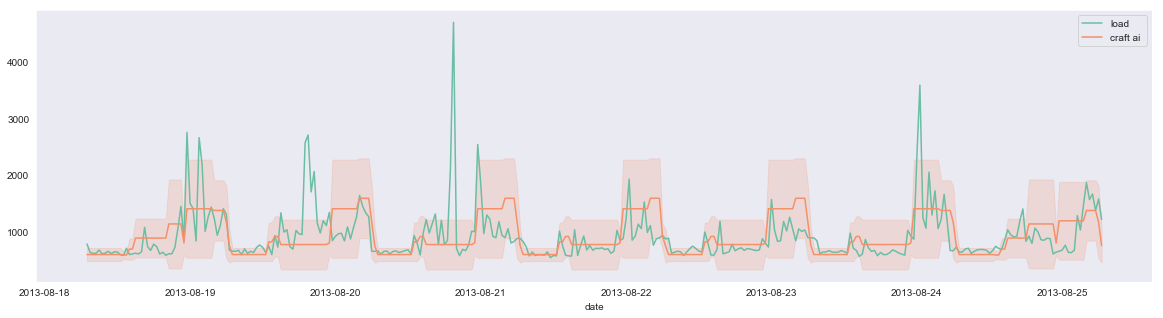

Model predictions for week n° 73


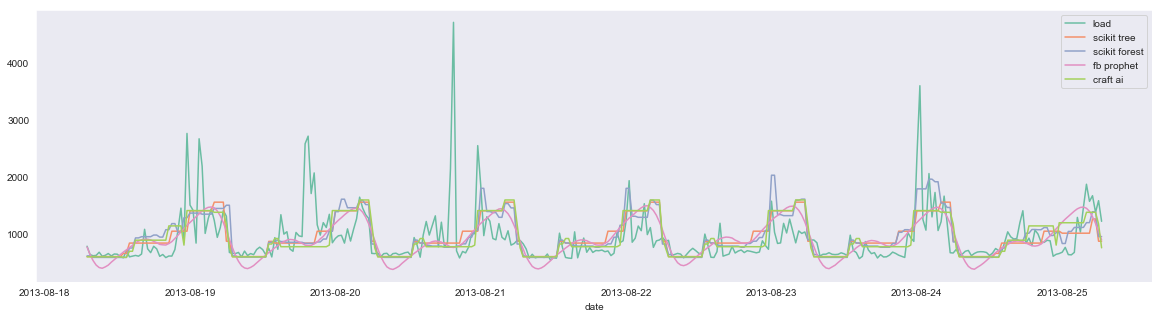

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    256.75  25.83  433.34  0.109059    73
scikit forest  254.43  25.84  431.58  0.116298    73
fb prophet     266.29  27.85  432.07  0.114309    73
craft ai       256.02  25.65  434.30  0.105128    73
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    320.55  29.63  548.73  0.185698    74
scikit forest  329.88  31.08  553.80  0.170597    74
fb prophet     348.43  33.13  562.14  0.145437    74
craft ai       330.20  31.12  543.54  0.201038    74
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    294.00  25.99  605.41  0.121305    75
scikit forest  327.36  29.30  629.95  0.048624    75
fb prophet     315.73  29.33  594.69  0.152129    75
craft ai       307.84  27.97  608.57  0.112110    75
                  mae   mape    rmse        r2

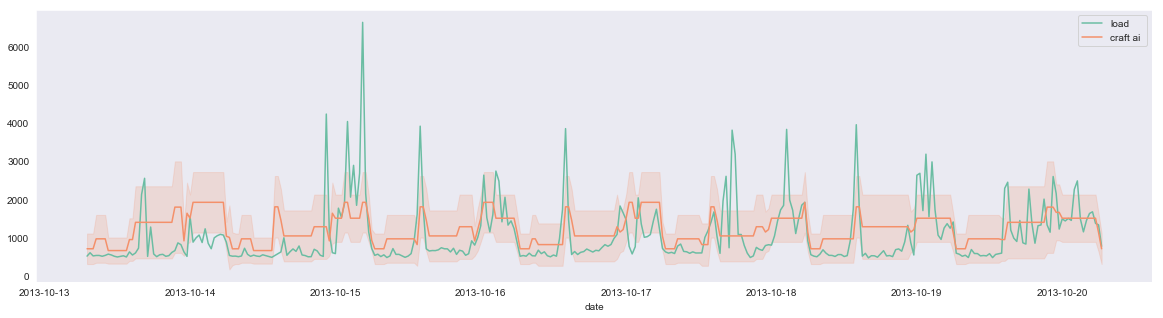

Model predictions for week n° 81


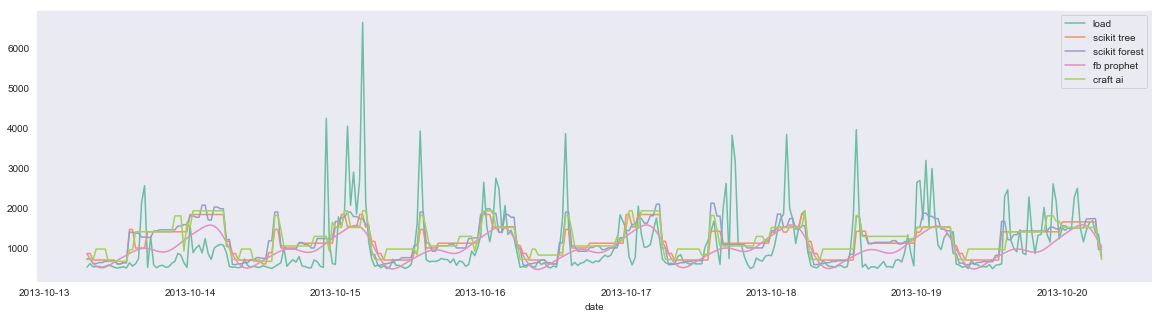

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    470.82  50.87  693.94  0.208689    81
scikit forest  448.10  48.28  673.99  0.253516    81
fb prophet     404.89  37.20  686.84  0.224786    81
craft ai       509.89  58.52  706.02  0.180881    81
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    425.22  40.22  654.02  0.276521    82
scikit forest  392.48  33.97  638.08  0.311358    82
fb prophet     380.49  30.18  690.10  0.194498    82
craft ai       461.58  47.96  644.48  0.297474    82
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    498.55  36.29  869.82  0.138160    83
scikit forest  493.45  35.99  854.01  0.169201    83
fb prophet     482.57  32.63  891.85  0.093948    83
craft ai       509.69  38.27  864.86  0.147961    83
                  mae   mape    rmse        r2

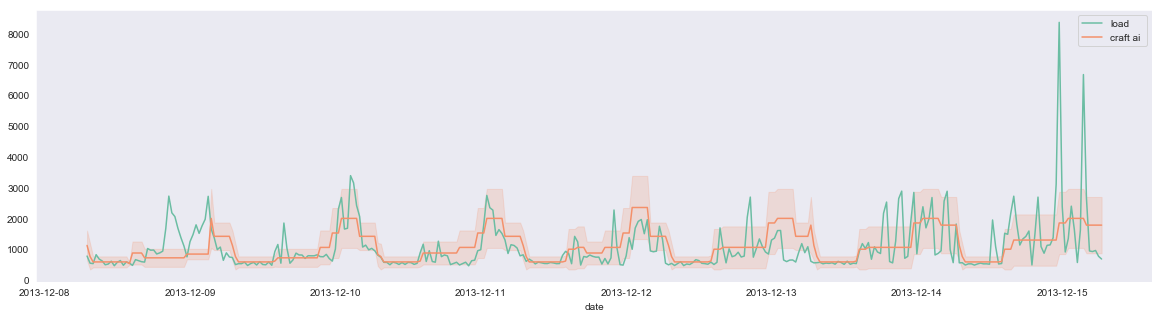

Model predictions for week n° 89


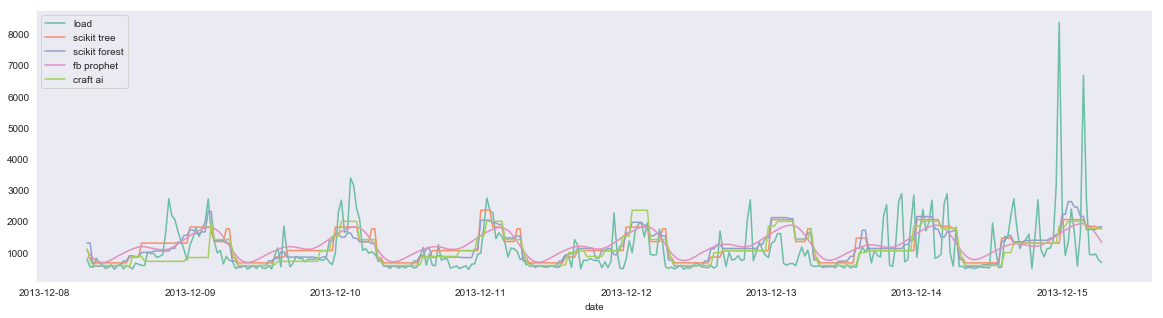

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    440.71  45.94  724.59  0.191303    89
scikit forest  421.10  42.36  713.56  0.215733    89
fb prophet     501.41  57.56  725.61  0.189016    89
craft ai       426.30  40.41  716.39  0.209497    89
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    522.13  57.26  743.95  0.043952    90
scikit forest  487.39  53.75  726.86  0.087369    90
fb prophet     557.23  68.31  731.21  0.076408    90
craft ai       465.52  49.78  708.38  0.133175    90
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    544.52  44.50  843.62  0.206673    91
scikit forest  528.71  42.65  822.96  0.245050    91
fb prophet     570.30  51.78  834.30  0.224101    91
craft ai       537.12  44.71  836.28  0.220412    91
                  mae   mape    rmse        r2

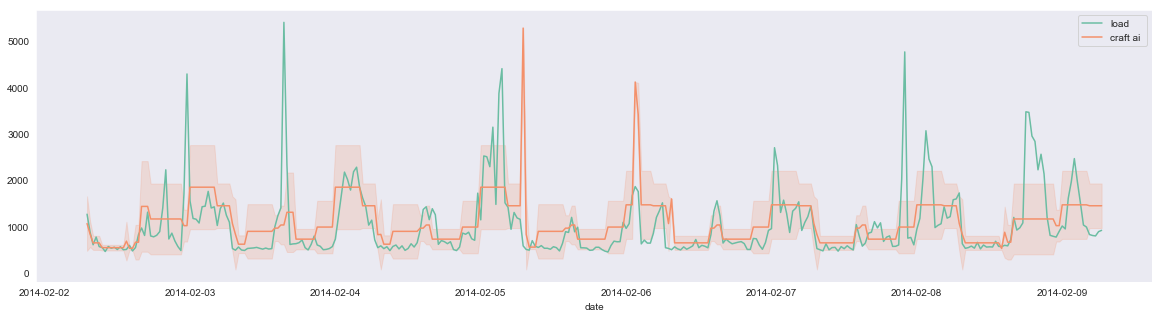

Model predictions for week n° 97


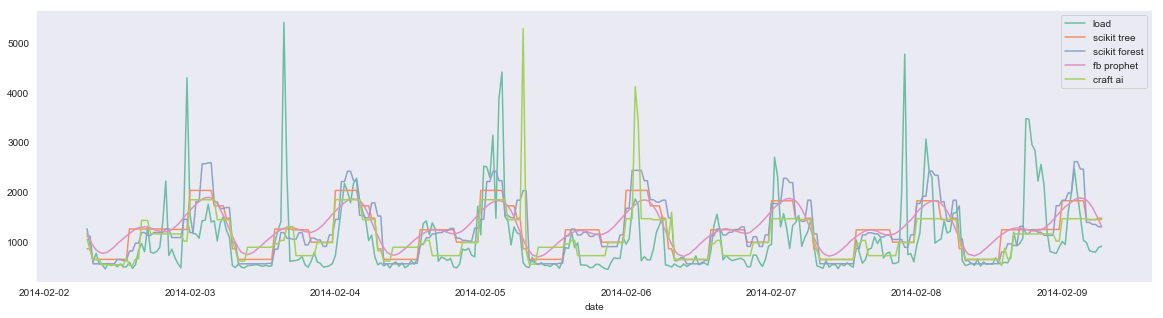

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    438.31  48.44  646.64  0.191544    97
scikit forest  443.59  47.60  677.13  0.113525    97
fb prophet     512.85  62.39  675.89  0.116751    97
craft ai       390.69  39.76  677.08  0.113655    97
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    519.57  48.30  762.39  0.280702    98
scikit forest  568.35  54.44  798.73  0.210501    98
fb prophet     561.47  58.45  768.88  0.268405    98
craft ai       525.47  48.69  748.95  0.305842    98
                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    488.39  48.18  697.11  0.150453    99
scikit forest  511.90  50.85  712.63  0.112191    99
fb prophet     543.87  59.45  707.80  0.124201    99
craft ai       500.31  47.67  702.08  0.138304    99
                  mae   mape    rmse        r2

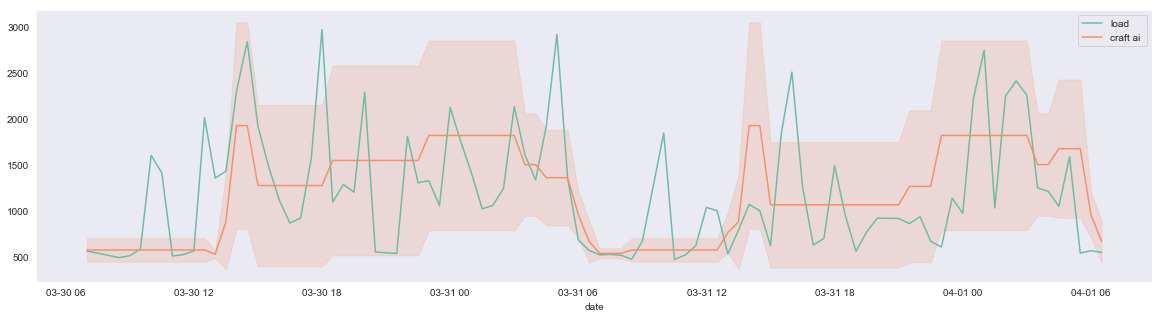

Model predictions for week n° 105


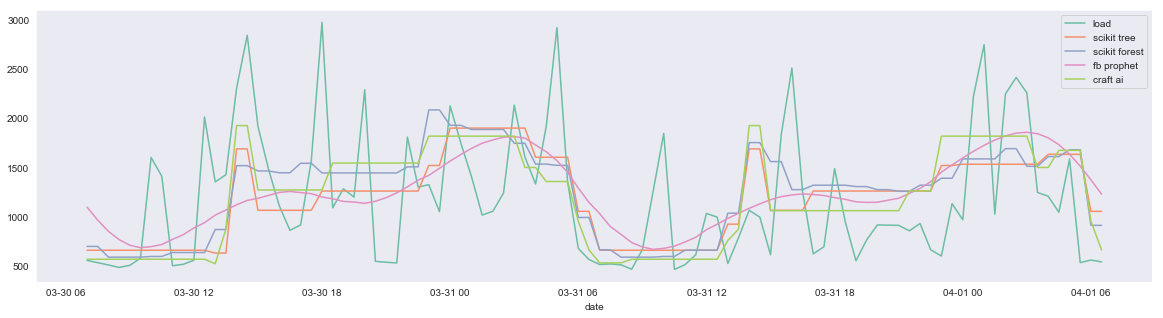

                  mae   mape    rmse        r2  week
ids                                                 
scikit tree    483.81  45.51  601.58  0.145348   105
scikit forest  490.88  47.58  610.25  0.120510   105
fb prophet     484.97  49.10  597.38  0.157225   105
craft ai       460.35  42.42  604.50  0.137011   105


In [102]:
week_unit = 7*24*2 #nombre de demi-heures dans une semaine
week_index = 8
max_week_index = data.shape[0]/(7*24*2)
#max_week_index =9
idx = ['scikit tree', 'scikit forest', 'prophet', 'sarima model', 'craft ai']
scores = []
all_preds = []

while week_index < max_week_index:
    last_train_index = week_index * week_unit
    last_test_index = (week_index +1) * week_unit
    week_preds = {}
    
    #compute and store other models' preds  
    data_train, data_test = bt.split_data(data, last_train_index , last_test_index)
    
    sk_tree_preds = bt.get_scikit_preds(data_train, data_test, max_depth = 6, exog=['temp'])
    week_preds['scikit tree'] = sk_tree_preds
    
    forest_preds = bt.get_forest_preds(data_train, data_test, n_estimators=6, max_depth=9, exog=['temp'])
    week_preds['scikit forest'] = forest_preds
    
    prophet_preds = bt.get_prophet_preds(data_train, data_test, exog=['temp'])
    week_preds['fb prophet'] = prophet_preds
    
#     try:
#         sarima_preds = bt.get_sarima_preds(data_train, data_test,week_unit, max_feed=3000)
#         week_preds['sarima'] = sarima_preds
#     except MemoryError:
#         print("Memory error for sarima preds on week", week_index)
#         sarima_preds = []
#         continue

    #compute craft ai preds 
    
    craft_preds_week = craft_preds.iloc[ (week_index - 8)*week_unit : (week_index - 8 +1) * week_unit]
    crp = craft_preds_week['predictedLoad'].values
    week_preds['craft ai'] = crp
        
    #get scores for the current week
    frame = bt.get_models_scores(data_test=data_test,
                      predictions=[sk_tree_preds, forest_preds, prophet_preds, crp], 
                      idx = ['scikit tree', 'scikit forest', 'fb prophet', 'craft ai'])
    frame['week'] = week_index +1 
    scores.append(frame)
    
    all_preds.append(week_preds)

    with open('scores_ampds_bench.pickle', 'wb') as f:
        # Pickle the score array so that we can retrieve the scores if the prog fails
        pickle.dump(scores, f, pickle.HIGHEST_PROTOCOL)

    with open('preds_ampds_dict.pickle', 'wb') as f:
        # Pickle the preds array so that we can plot and compare after 
        pickle.dump(all_preds, f, pickle.HIGHEST_PROTOCOL)
    

    
    #once in a while, print our predictions to see how they compare to each other and to the real values
    if (week_index%8 ==0):
        std = craft_preds_week['standardDeviation'].values
        
        print("Craft ai predictions for week n° {}".format(week_index+1))
        bt.plot_period_predictions(data_test.drop('temp',1), 
                                        predictions = {'craft ai ':crp}, 
                                        standardDev = True,
                                        low_val = crp - std,
                                        upper_val = crp + std)
        
        print("Model predictions for week n° {}".format(week_index+1))
        bt.plot_period_predictions(data_test=data_test.drop('temp',1),
                                    predictions = week_preds)
    #print scores 
    print(frame)
    #update index
    week_index +=1

In [103]:
#Adding another depth for craft ai 
craft_preds_4 = pd.read_json('preds/ampds_4_rolling_results.json', convert_dates=['date']).set_index('date')

week_unit = 7*24*2 #nombre de demi-heures dans une semaine
week_index = 8
max_week_index = data.shape[0]/(7*24*2)
#max_week_index =9
idx = ['scikit tree', 'scikit forest', 'prophet', 'sarima model', 'craft ai']
scores_4 = []

while week_index < max_week_index:
    last_train_index = week_index * week_unit
    last_test_index = (week_index +1) * week_unit
    week_preds = {}
    
    #compute and store other models' preds  
    data_train, data_test = bt.split_data(data, last_train_index , last_test_index)
    
    craft_preds_week_4 = craft_preds_4.iloc[ (week_index - 8)*week_unit : (week_index - 8 +1) * week_unit]
    crp = craft_preds_week['predictedLoad'].values
    week_preds['craft ai'] = crp
        
    #get scores for the current week
    frame = bt.get_models_scores(data_test=data_test,
                      predictions=[crp], 
                      idx = ['craft ai 4'])
    frame['week'] = week_index +1 
    scores_4.append(frame)
    
    #print scores 
    print(frame)
    #update index
    week_index +=1

               mae   mape    rmse        r2  week
ids                                              
craft ai 4  410.86  48.35  576.59 -0.200863     9
               mae  mape    rmse        r2  week
ids                                             
craft ai 4  537.45  64.8  774.51  0.009675    10
               mae    mape    rmse        r2  week
ids                                               
craft ai 4  621.08  109.93  763.08 -4.629018    11
               mae    mape    rmse        r2  week
ids                                               
craft ai 4  635.91  106.63  776.36 -0.388046    12
               mae   mape    rmse        r2  week
ids                                              
craft ai 4  477.24  65.24  591.89 -0.525531    13
              mae   mape    rmse        r2  week
ids                                             
craft ai 4  521.1  68.85  728.67 -0.565026    14
               mae   mape    rmse        r2  week
ids                                              


In [90]:
with open('scores_ampds_bench.pickle', 'rb') as f:
    scores = pickle.load(f)

### Scores finaux 

In [128]:
def get_scores(start, n_weeks):
    final_table = pd.concat([scores[start],],0)
    for i,score in enumerate(scores[start+1:start+n_weeks]):
        final_table = pd.concat([final_table, score],0)
    return final_table.reset_index().set_index(['ids', 'week'])

In [133]:
final_table = get_scores(0,50)

In [134]:
final_table.groupby(by='ids').mean()

,mae,mape,rmse,r2
ids,,,,
craft ai,480.9038,44.9020,733.4962,0.036610
fb prophet,492.7848,49.5370,702.2296,0.126886
scikit forest,492.5284,46.7824,742.9684,0.000003
scikit tree,482.1792,45.5804,727.6612,0.047319


In [135]:
desc = final_table.groupby(by='ids').describe()

In [136]:
desc['r2']

,count,mean,std,min,25%,50%,75%,max
ids,,,,,,,,
craft ai,50.0,0.036610,0.251370,-0.984741,-0.002635,0.098313,0.182702,0.297004
fb prophet,50.0,0.126886,0.156531,-0.749863,0.098812,0.147089,0.202168,0.329235
scikit forest,50.0,0.000003,0.317226,-1.666703,-0.039213,0.090905,0.171411,0.281801
scikit tree,50.0,0.047319,0.267235,-1.219940,0.043143,0.135761,0.180145,0.369422


#### Final Scores

In [85]:
final_table = scores[0]
for score in scores[1:]:
    final_table = pd.concat([final_table, score],0)
final_table = final_table.reset_index().set_index(['ids', 'week'])
final_table.groupby(by='ids').mean()

,mae,mape,rmse,r2
ids,,,,
craft ai,451.275773,42.055876,700.870206,0.118130
scikit forest,454.975567,41.534433,711.675773,0.086752
scikit tree,453.616082,42.377320,694.278454,0.138483


In [17]:
final_table = scores[0]
for score in scores[1:]:
    final_table = pd.concat([final_table, score],0)
final_table = final_table.reset_index().set_index(['ids', 'week'])
final_table.groupby(by='ids').mean()

,mae,mape,rmse,r2
ids,,,,
craft ai,412.938144,37.125052,661.206186,0.217005
prophet,465.639175,45.927423,690.309278,0.152555
sarima model,436.969072,40.741340,675.958763,0.185501
scikit forest,454.690722,43.258969,691.278351,0.147268
scikit tree,458.783505,43.841031,690.927835,0.154164


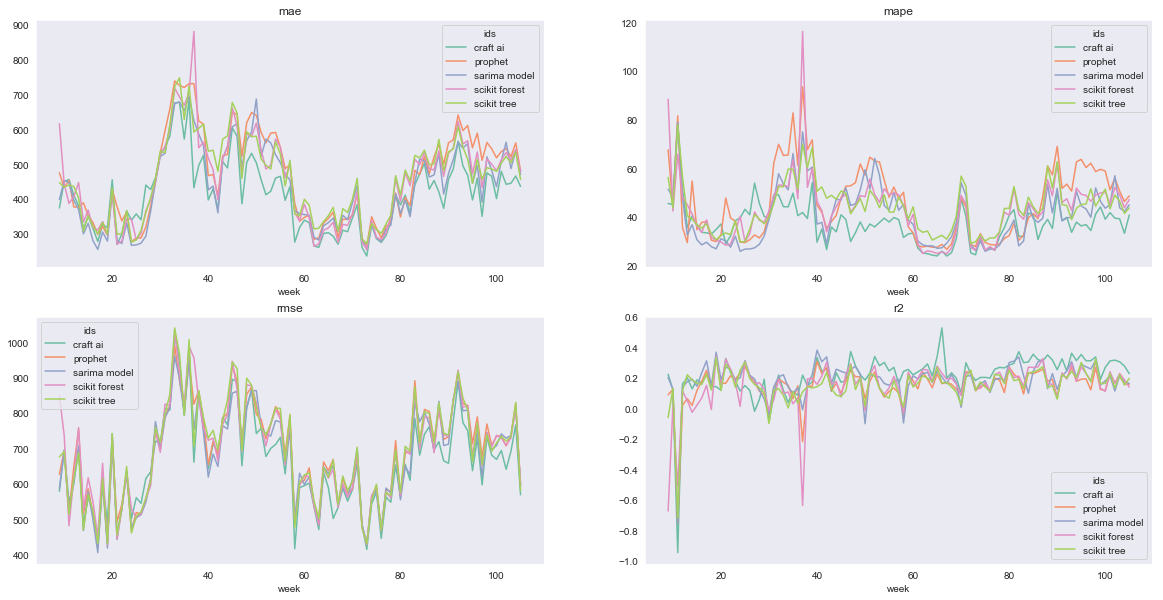

In [24]:
#printing the results 
fig, axes = plt.subplots(2,2, figsize=(20,10))
indexes = list(itertools.product(np.arange(0,2), np.arange(0,2)))
for i,metric in enumerate(final_table.columns):
    final_table.unstack()[metric].T.plot(ax = axes[indexes[i]])
    axes[indexes[i]].set_title(metric)
plt.show()